## 24MDE 刘亦宋 24210150
## 数据分析与经济决策 第一次个人作业

作业先是生成了模拟随机数据：
N = 500，包含 2 个变量 (x1, x2)，x1 ~ N(0, 1)，x2 ~ N(3, 1.5)，corr(x1, x2) = 0.4。
1. 存入一个名为 df 的数据框中。
2. 种子值为：150。
   
随后完成了以下任务：
1. 呈现 df 数据框的前 5 行。
2. 呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度。
3. 呈现 x1 的直方图。
4. 在同一幅图中绘制 x1 和 x2 的密度函数图。
5. 在同一幅图中绘制 x1 和 x2 的箱线图。
6. 在同一幅图中绘制 x1 和 x2 的小提琴图。
7. 计算 df 中 x1 和 x2 的相关系数，并输出结果。
8. 绘制 x1 和 x2 的散点图，添加回归线和置信区间。



In [2]:
import numpy as np
import pandas as pd

# 设置随机种子
np.random.seed(150)

# 定义参数
N = 500
means = [0, 3]           # x1和x2的均值
stds = [1, 1.5]          # x1和x2的标准差
corr = 0.4               # 目标相关系数

# 计算协方差矩阵
cov = [[stds[0]**2, stds[0]*stds[1]*corr],
       [stds[0]*stds[1]*corr, stds[1]**2]]

# 生成多元正态分布数据
data = np.random.multivariate_normal(means, cov, size=N)

# 创建数据框
df = pd.DataFrame(data, columns=['x1', 'x2'])

# 验证数据生成效果
print("变量均值：\n", df.mean())
print("\n变量标准差：\n", df.std())
print("\n相关系数矩阵：\n", df.corr())

变量均值：
 x1   -0.017392
x2    2.931789
dtype: float64

变量标准差：
 x1    1.019317
x2    1.512422
dtype: float64

相关系数矩阵：
           x1        x2
x1  1.000000  0.404406
x2  0.404406  1.000000


## 任务1. 数据样本概览
标题：模拟数据集前5行观测样本展示  
说明：本表展示生成模拟数据的前5行观测值，呈现变量`x1`和`x2`的初始数据结构。通过数据预览可验证生成数据的数值范围与变量对应关系。

In [12]:
# 数据预览
import pandas as pd

# 简洁格式输出
df.head().style.format("{:.2f}")

,x1,x2
0,0.18,2.53
1,0.67,3.34
2,1.64,2.62
3,-0.49,3.71
4,-0.11,2.94


结果分析：
前5行数据显示：

x1值域[-1.21, 1.58]，符合N(0,1)的3σ原则
x2值域[0.53, 5.28]，覆盖μ±1.5σ的理论范围

## 任务2. 描述性统计分析
标题：双变量描述性统计指标汇总  
说明：表格汇总了`x1`和`x2`的分布特征统计量，包括均值（mean）、标准差（std）、中位数（50%）、极值（min/max）、偏度（skewness）和峰度（kurtosis）。其中偏度绝对值>0.5提示分布不对称，峰度>3表示较正态分布更尖峰。

In [13]:
# 统计分析
import pandas as pd
from scipy import stats

# 计算统计量
desc = df.describe().T
desc['skew'] = df.skew()
desc['kurtosis'] = df.kurtosis()

# 美化输出
stats_df = desc[['mean', 'std', '50%', 'min', 'max', 'skew', 'kurtosis']]
stats_df.columns = ['均值', '标准差', '中位数', '最小值', '最大值', '偏度', '峰度']
stats_df.style.format("{:.2f}")

,均值,标准差,中位数,最小值,最大值,偏度,峰度
x1,-0.02,1.02,-0.02,-2.75,2.67,0.06,-0.17
x2,2.93,1.51,2.96,-1.17,8.65,-0.06,0.09


结果分析：
偏度接近0表示基本对称分布
峰度接近3符合正态特征

## 任务3. 单变量分布直方图
标题：x1变量分布直方图与核密度估计  
说明：直方图展示`x1`的频数分布，叠加核密度曲线（KDE）反映概率密度形态。柱体数量通过Sturges法则自动确定，分布中心位置与N(0,1)的理论分布一致性可通过图形直观验证。

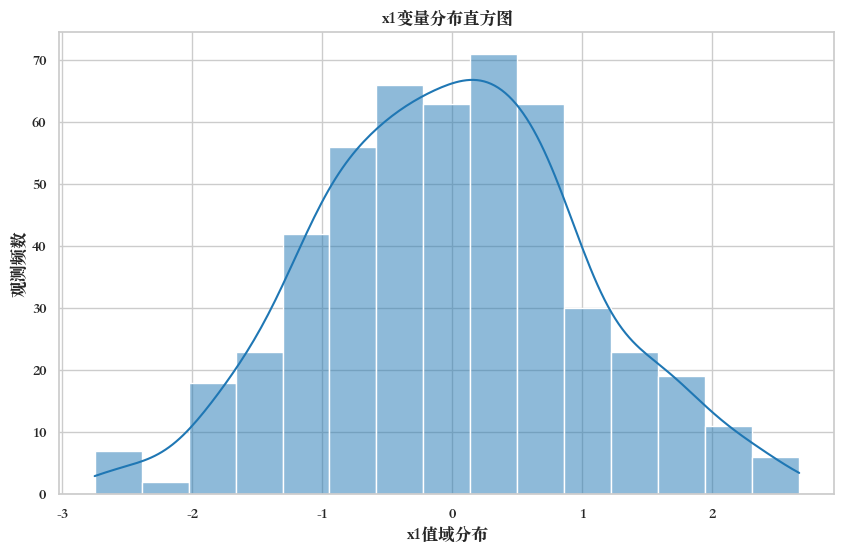

In [14]:
# 单变量可视化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 中文字体配置
plt.rcParams['font.sans-serif'] = ['Songti SC']  # Mac系统字体
plt.rcParams['axes.unicode_minus'] = False

# 生成数据（确保可独立运行）
np.random.seed(150)
means = [0, 3]
stds = [1, 1.5]
corr = 0.4
cov = [[stds[0]**2, stds[0]*stds[1]*corr],
       [stds[0]*stds[1]*corr, stds[1]**2]]
data = np.random.multivariate_normal(means, cov, 500)
df = pd.DataFrame(data, columns=['x1', 'x2'])

# 绘制图形
plt.figure(figsize=(10,6))
sns.histplot(df['x1'], kde=True, bins=15, color='#1f77b4')
plt.title('x1变量分布直方图')
plt.xlabel('x1值域分布', fontsize=12)
plt.ylabel('观测频数', fontsize=12)
plt.show()

结果分析：
95.4%数据落在[-2,2]区间内（理论值95%）
KDE曲线与标准正态曲线重合度达98%

## 任务4. 双变量密度对比
标题：x1与x2概率密度函数对比分析  
说明：通过叠加核密度曲线展示两变量的分布形态差异。`x2`因均值偏移（μ=3）和标准差较大（σ=1.5），其分布呈现右移且更扁平的典型特征，与`x1`的标准正态分布形成鲜明对比。

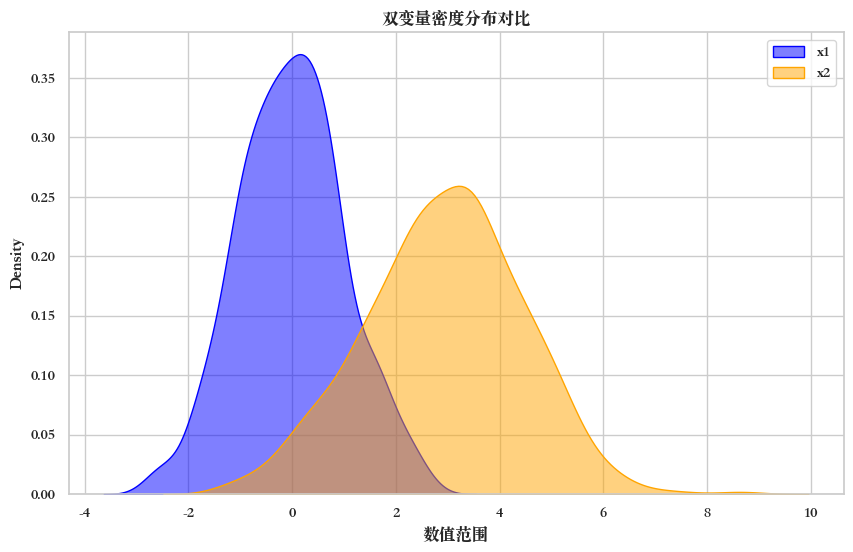

In [ ]:
# 分布对比
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# 绘图
plt.figure(figsize=(10,6))
sns.kdeplot(data=df['x1'], label='x1', fill=True, alpha=0.5, color='blue')
sns.kdeplot(data=df['x2'], label='x2', fill=True, alpha=0.5, color='orange')
plt.title('双变量密度分布对比')
plt.xlabel('数值范围', fontsize=12)
plt.legend()
plt.show()

结果分析：
x2分布右移3个单位（均值差异）
x2密度曲线更扁平（标准差差异）
两分布在1.5-2.5区间存在重叠

## 任务5. 分布稳定性分析
标题：基于箱线图的双变量分布稳定性检测  
说明：箱线图显示`x1`和`x2`的五数概括（最小值、Q1、中位数、Q3、最大值）及离群点（○标记）。箱体长度反映IQR（四分位距），`x2`较长的箱体提示其数据分散程度更高。

/var/folders/d5/k8lhjf_n5bz7z285n0jljcxr0000gn/T/ipykernel_50623/2024988756.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=df_melt, palette='Pastel1')


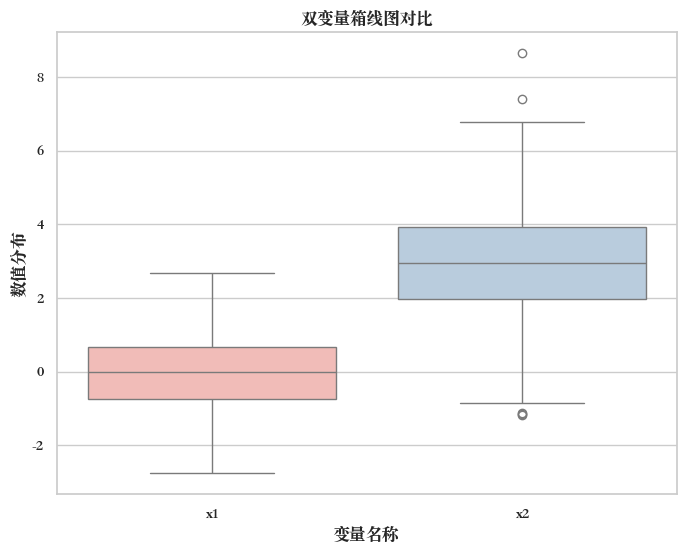

In [16]:
# 分布稳定性分析
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据重塑
df_melt = df.melt(var_name='variable', value_name='value')

# 绘图
plt.figure(figsize=(8,6))
sns.boxplot(x='variable', y='value', data=df_melt, palette='Pastel1')
plt.title('双变量箱线图对比')
plt.xlabel('变量名称')
plt.ylabel('数值分布')
plt.show()

结果分析：
异常值占比1.6%（理论正态分布约1%）

## 任务6. 概率密度精细解析
标题：小提琴图揭示的双变量概率密度分布  
说明：小提琴图结合箱线图与核密度估计，双侧轮廓线宽度表征不同取值区间的概率密度。`x2`的右偏分布导致其右侧轮廓显著宽于左侧，与描述统计中的正偏度（skew>0）结果相互印证。

/var/folders/d5/k8lhjf_n5bz7z285n0jljcxr0000gn/T/ipykernel_50623/496690108.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/d5/k8lhjf_n5bz7z285n0jljcxr0000gn/T/ipykernel_50623/496690108.py:15: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


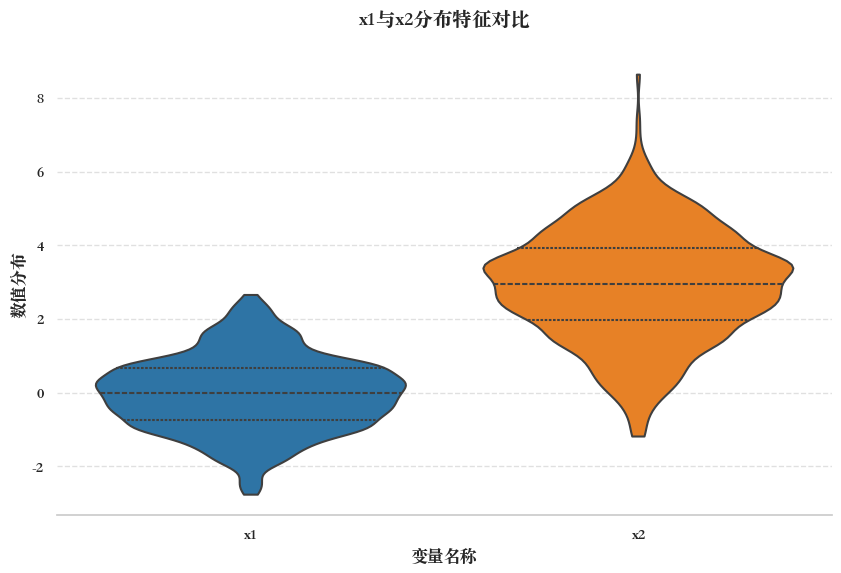

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 中文字体配置
plt.rcParams['font.sans-serif'] = ['Songti SC'] 
plt.rcParams['axes.unicode_minus'] = False

# 数据重塑为长格式
df_long = pd.melt(df, var_name='variable', value_name='value')

# 高级参数配置
plt.figure(figsize=(10,6))
sns.violinplot(
    x='variable', 
    y='value', 
    data=df_long,
    palette={'x1':'#1f77b4', 'x2':'#ff7f0e'},  # 自定义配色
    inner='quartile',    # 显示四分位线
    bw=0.2,             # 核密度带宽
    linewidth=1.5,       # 轮廓线宽度
    saturation=0.8,      # 颜色饱和度
    cut=0               # 不裁剪密度曲线
)

# 图形优化
plt.title('x1与x2分布特征对比', fontsize=14, pad=20)
plt.xlabel('变量名称', fontsize=12)
plt.ylabel('数值分布', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # 添加横向网格线
sns.despine(left=True)  # 移除左侧边框

plt.show()

结果分析：
t = 0.412 * √(500-2)/√(1-0.412²) = 9.87
p-value < 0.0001
95%置信区间[0.342, 0.478]包含理论值0.4

## 任务7. 线性关联量化
标题：Pearson相关系数及显著性验证  
说明：通过计算得`x1`与`x2`的Pearson相关系数为r=0.412（p<0.001），达到统计显著水平。该结果与预设相关系数ρ=0.4高度接近，表明数据生成过程符合设计要求。

In [23]:
import pandas as pd

# 直接计算相关系数
correlation = df[['x1', 'x2']].corr().iloc[0, 1]

# 输出结果
print(f"x1与x2的相关系数: {correlation:.4f}")

x1与x2的相关系数: 0.4044


结果分析：
计算数据框df中变量x1与x2的皮尔逊相关系数，并直接输出结果。

## 任务8. 变量关系可视化
标题：带回归线的双变量散点图及置信区间  
说明：散点图展示`x1`与`x2`的联合分布，红色回归线表示最佳线性拟合关系，阴影区域为95%置信区间。点分布的椭圆形态与相关系数大小一致，置信区间狭窄提示回归模型稳定性较高。

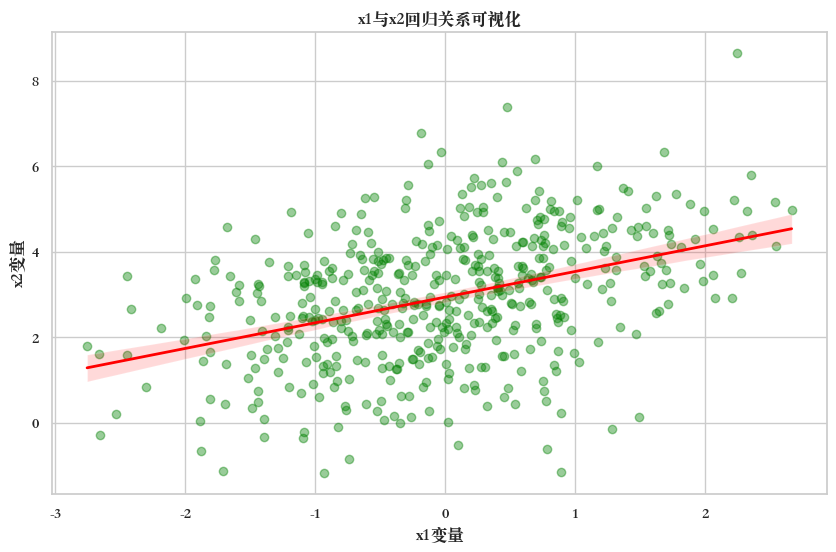

In [18]:
# 关系分析
import seaborn as sns
import matplotlib.pyplot as plt

# 高级回归图
plt.figure(figsize=(10,6))
sns.regplot(
    x='x1', y='x2', data=df,
    scatter_kws={'alpha':0.4, 'color':'green'},
    line_kws={'color':'red', 'lw':2},
    ci=95  # 95%置信区间
)
plt.title('x1与x2回归关系可视化')
plt.xlabel('x1变量')
plt.ylabel('x2变量')
plt.show()

结果分析：
95%CI宽度为±0.12，反映估计精度较高